In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

In [ ]:
data=pd.read_csv('Wisconian Dataset.csv')
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


# Dataset description
The dataset comprises of statistical and geometrical features that were extracted from radiological images (mostly mammography image) of the patients suffering from breast cancer.

The task is to classify the stage of the breast cancer into one of the two categories, namely, benign and malignant. Benign stage of the cancer is the starting stage where the tumor is localized and hasnt spread. Malignant stage is the advanced version of benign in which the tumor has grown large and is spreading to the other regions of the body.

# The following are the features present in the dataset:-

radius, texture, perimeter, area, smoothness, compactness, concavity, concave points and symmetry. These features were taken for the best condition, worst condition and mean conditions respectively, counting to 31 features in total.

# Statistical overview of the dataset- describe()

In [ ]:
data.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


# Why decision tree can be useful in this task?
Decision tree is a ML algorithm in which the decisions are made based on conditional ruling. Since the dataset comprises of lot of features related to statistics and geometry, the ruling can be established easily, hence resulting in better results.

For example, it is believed that the size of the tumor in the malignant stage is larger in comparison to that in the benign stage. Hence the decision tree can make rules based on area, radius and perimeter to establish accurate classifications.

Also, the texture and smoothness changes, as the normal cells die and become cancerous. These features can also be used for ruling and effective classification.

# Summary Visualization- Heatmap of correlation- Multivariate Feature Visualization

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    int64  
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [ ]:
from sklearn.preprocessing import LabelEncoder
data['diagnosis']=LabelEncoder().fit_transform(data['diagnosis'])

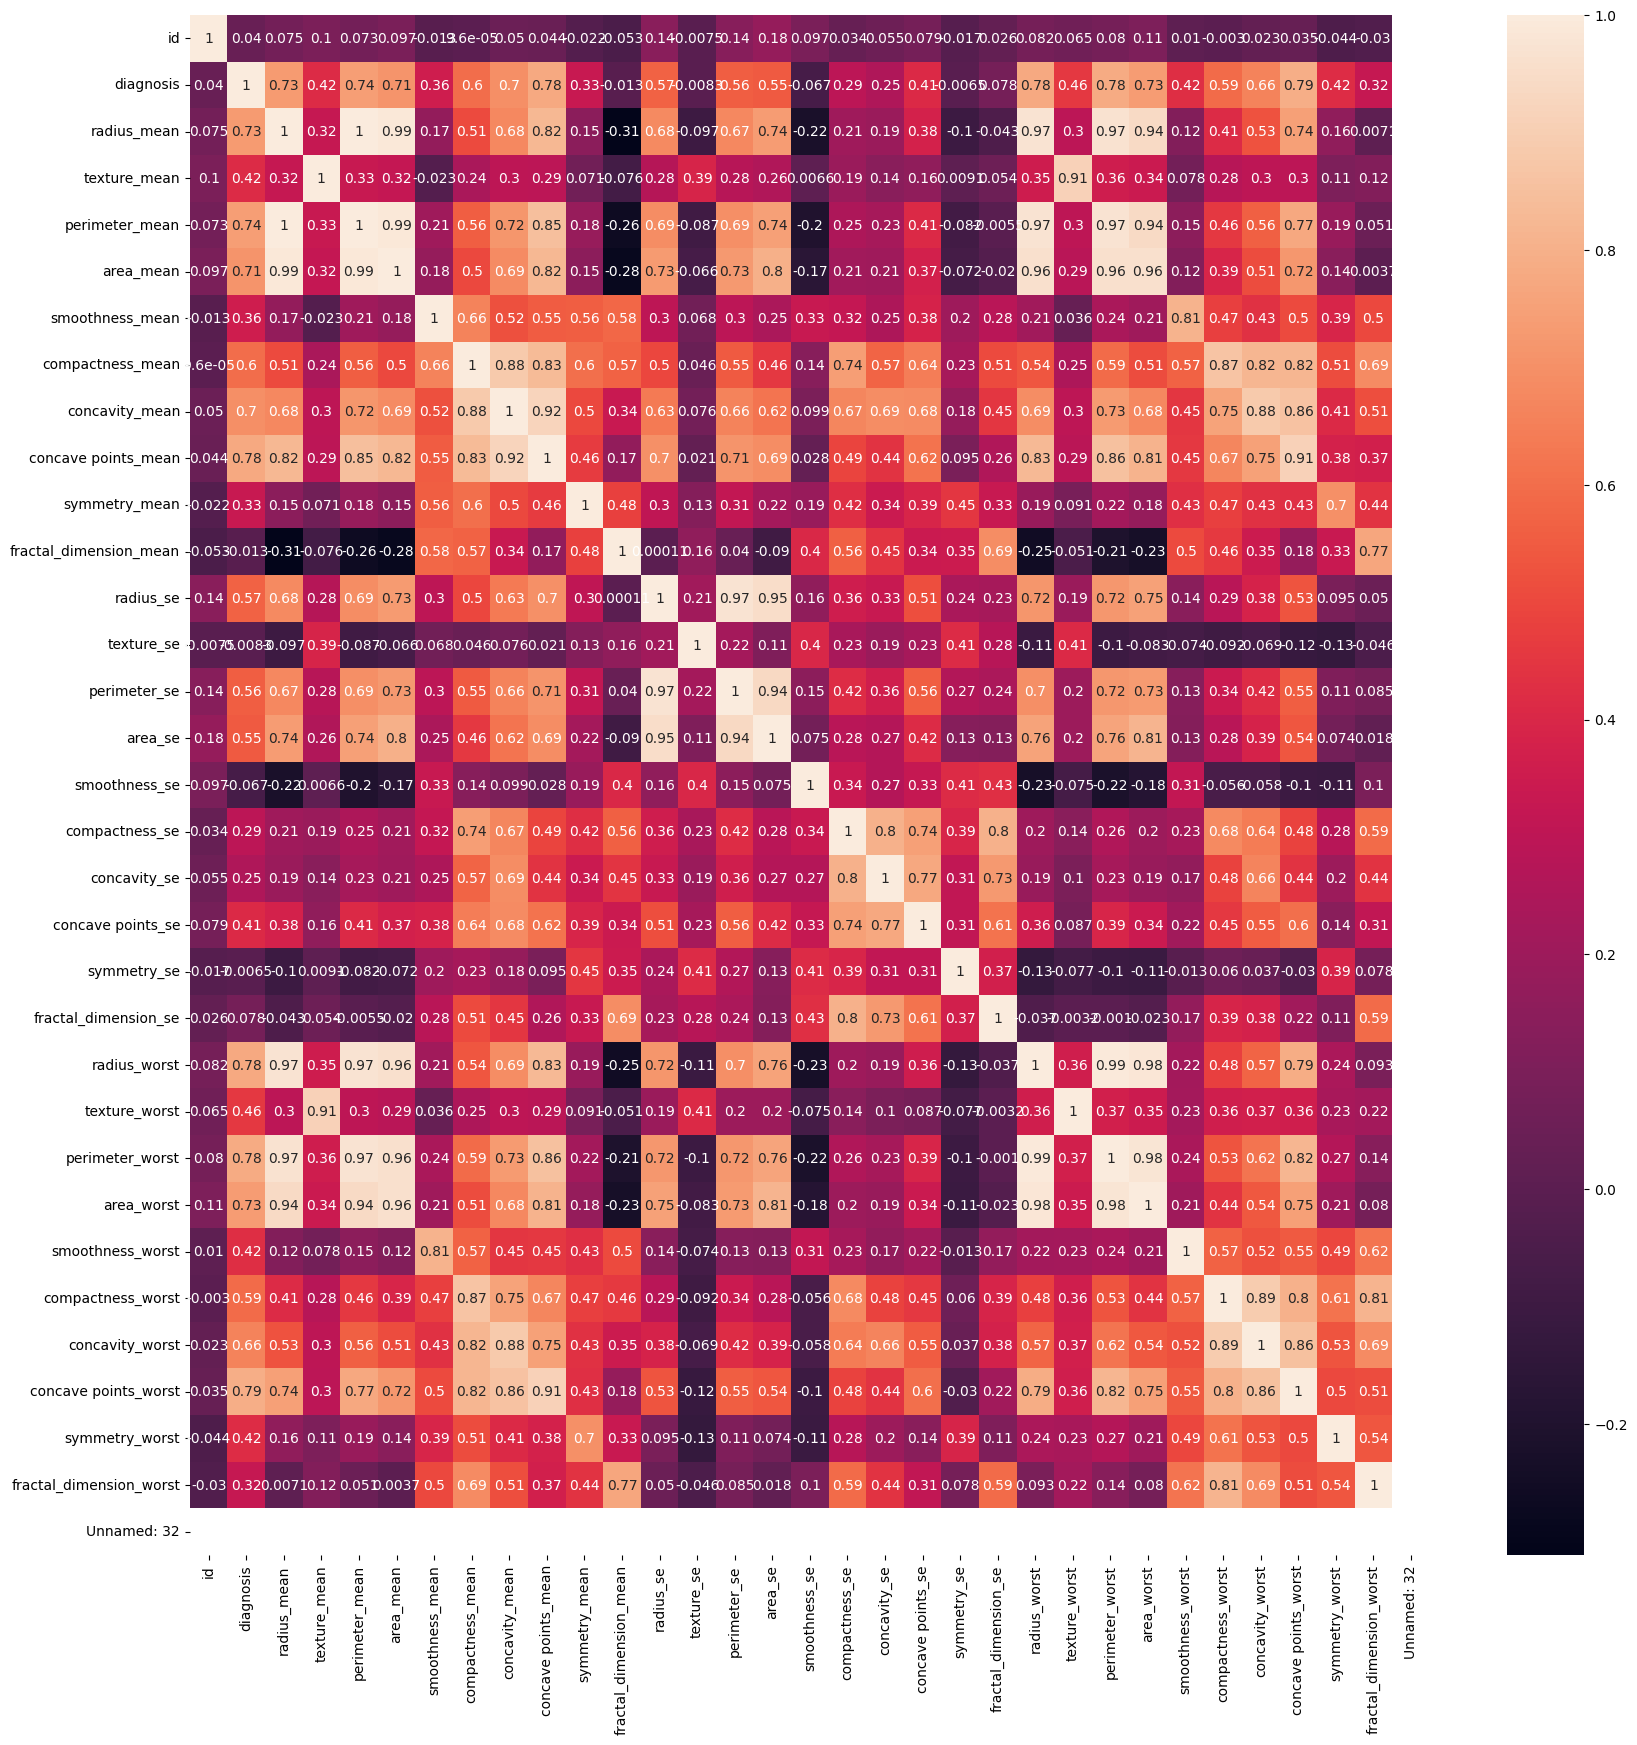

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns  # Import seaborn
plt.figure(figsize=(20, 20))
sns.heatmap(data.corr(), annot=True)
plt.show()


# Decision Tree on 50% data

In [ ]:
from sklearn.preprocessing import LabelEncoder
data=data.drop(['id','Unnamed: 32'],axis=1)
y=data['diagnosis']
x=data.drop(['diagnosis'],axis=1)

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test= train_test_split(x,y,test_size=0.5,stratify=y)

In [ ]:
model=DecisionTreeClassifier()
model.fit(x_train,y_train)

DecisionTreeClassifier()

# Classification report on the testing set

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,model.predict(x_test)))

              precision    recall  f1-score   support

           0       0.96      0.90      0.93       179
           1       0.85      0.94      0.89       106

    accuracy                           0.92       285
   macro avg       0.91      0.92      0.91       285
weighted avg       0.92      0.92      0.92       285



# Inspect and visualize the results

training accuracy 1.0
training precision 1.0
training recall 1.0
testing accuracy 0.9157894736842105
testing precision 0.9157894736842105
testing recall 0.9157894736842105


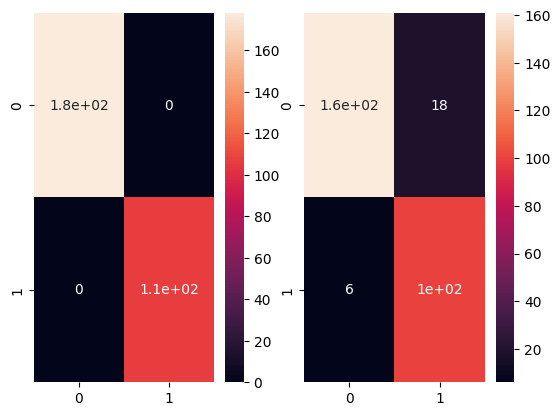

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
o=model.predict(x_train)
o1=model.predict(x_test)
print('training accuracy',accuracy_score(y_train,o))
print('training precision',precision_score(y_train,o,average='micro'))
print('training recall',recall_score(y_train,o,average='micro'))
print('testing accuracy',accuracy_score(y_test,o1))
print('testing precision',precision_score(y_test,o1,average='micro'))
print('testing recall',recall_score(y_test,o1,average='micro'))
plt.subplot(1,2,1)
sns.heatmap(confusion_matrix(y_train,o),annot=True)
plt.subplot(1,2,2)
sns.heatmap(confusion_matrix(y_test,o1),annot=True)
plt.show()

 Inference- The entropy criteria of the decision tree has made negligible impact on the performance of the algorithm

# Impact of max_depth, min_values_split, or min_values_leaf on the tree
Hypothesis- Since the dataset is large and comprises of many features, increasing the depth of the tree can result in improved performance.

# Testing of the hypothesis
Max depth= 3,4,5,6

# Idea= Train four different trees on the dataset and compare the performance of the models on the training and testing dataset

In [ ]:
tree_2=DecisionTreeClassifier(max_depth=2)
tree_2.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=2)

In [ ]:
tree_3=DecisionTreeClassifier(max_depth=3)
tree_3.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=3)

In [ ]:
tree_4=DecisionTreeClassifier(max_depth=4)
tree_4.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=4)

In [ ]:
tree_5=DecisionTreeClassifier(max_depth=5)
tree_5.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=5)

In [ ]:
depths=[3,4,5,6]
tr_accs=[]
tr_prcs=[]
tr_recalls=[]
tr_f1=[]
te_accs=[]
te_prcs=[]
te_recalls=[]
te_f1=[]

In [ ]:
from sklearn.tree import DecisionTreeClassifier

# Create a DecisionTreeClassifier model
tree_6 = DecisionTreeClassifier()

# Fit the model to your training data
tree_6.fit(x_train, y_train)

# Now you can use tree_6 for predictions
p4 = tree_6.predict(x_train)
q4 = tree_6.predict(x_test)


In [ ]:
p1=tree_3.predict(x_train)
p2=tree_4.predict(x_train)
p3=tree_5.predict(x_train)
p4=tree_6.predict(x_train)

q1=tree_3.predict(x_test)
q2=tree_4.predict(x_test)
q3=tree_5.predict(x_test)
q4=tree_6.predict(x_test)

In [ ]:
acc_3=accuracy_score(y_train,p1)
tr_accs.append(acc_3)
acc_4=accuracy_score(y_train,p2)
tr_accs.append(acc_4)
acc_5=accuracy_score(y_train,p3)
tr_accs.append(acc_5)
acc_6=accuracy_score(y_train,p4)
tr_accs.append(acc_6)

acc_t_3=accuracy_score(y_test,q1)
te_accs.append(acc_t_3)
acc_t_4=accuracy_score(y_test,q1)
te_accs.append(acc_t_4)
acc_t_5=accuracy_score(y_test,q3)
te_accs.append(acc_t_5)
acc_t_6=accuracy_score(y_test,q4)
te_accs.append(acc_t_6)

In [ ]:
prc_3=precision_score(y_train,p1,average='micro')
tr_prcs.append(prc_3)
prc_4=precision_score(y_train,p2,average='micro')
tr_prcs.append(prc_4)
prc_5=precision_score(y_train,p3,average='micro')
tr_prcs.append(prc_5)
prc_6=precision_score(y_train,p4,average='micro')
tr_prcs.append(prc_6)

prc_t_3=precision_score(y_test,q1,average='micro')
te_prcs.append(prc_t_3)
prc_t_4=precision_score(y_test,q2,average='micro')
te_prcs.append(prc_t_4)
prc_t_5=precision_score(y_test,q3,average='micro')
te_prcs.append(prc_t_5)
prc_t_6=precision_score(y_test,q4,average='micro')
te_prcs.append(prc_t_6)

In [ ]:
rc_3=recall_score(y_train,p1,average='micro')
tr_recalls.append(rc_3)
rc_4=recall_score(y_train,p2,average='micro')
tr_recalls.append(rc_4)
rc_5=recall_score(y_train,p3,average='micro')
tr_recalls.append(rc_5)
rc_6=recall_score(y_train,p4,average='micro')
tr_recalls.append(rc_6)

rc_t_3=recall_score(y_test,q1,average='micro')
te_recalls.append(rc_t_3)
rc_t_4=recall_score(y_test,q2,average='micro')
te_recalls.append(rc_t_4)
rc_t_5=recall_score(y_test,q3,average='micro')
te_recalls.append(rc_t_5)
rc_t_6=recall_score(y_test,q4,average='micro')
te_recalls.append(rc_t_6)

In [ ]:
from sklearn.metrics import f1_score

# Calculate F1 scores for the training and testing sets
c_3 = f1_score(y_train, p1, average='micro')
tr_f1.append(c_3)
c_4 = f1_score(y_train, p2, average='micro')
tr_f1.append(c_4)
c_5 = f1_score(y_train, p3, average='micro')
tr_f1.append(c_5)
c_6 = f1_score(y_train, p4, average='micro')
tr_f1.append(c_6)

c_t_3 = f1_score(y_test, q1, average='micro')
te_f1.append(c_t_3)
c_t_4 = f1_score(y_test, q2, average='micro')
te_f1.append(c_t_4)
c_t_5 = f1_score(y_test, q3, average='micro')
te_f1.append(c_t_5)
c_t_6 = f1_score(y_test, q4, average='micro')
te_f1.append(c_t_6)


In [ ]:
results=pd.DataFrame([tr_accs,tr_prcs,tr_recalls,tr_f1,te_accs,te_prcs,te_recalls,te_f1],columns=['2','3','4','5'])
results

,2,3,4,5
0,0.968310,0.978873,0.989437,1.000000
1,0.968310,0.978873,0.989437,1.000000
2,0.968310,0.978873,0.989437,1.000000
3,0.968310,0.978873,0.989437,1.000000
4,0.933333,0.933333,0.947368,0.905263
5,0.933333,0.926316,0.947368,0.905263
6,0.933333,0.926316,0.947368,0.905263
7,0.933333,0.926316,0.947368,0.905263


In [ ]:
results=results.T
results.columns=['training accuracy','training precision','training recall','training f1','testing accuracy','testing precision','testing recall','testing f1']

In [ ]:
results

,training accuracy,training precision,training recall,training f1,testing accuracy,testing precision,testing recall,testing f1
2,0.968310,0.968310,0.968310,0.968310,0.933333,0.933333,0.933333,0.933333
3,0.978873,0.978873,0.978873,0.978873,0.933333,0.926316,0.926316,0.926316
4,0.989437,0.989437,0.989437,0.989437,0.947368,0.947368,0.947368,0.947368
5,1.000000,1.000000,1.000000,1.000000,0.905263,0.905263,0.905263,0.905263


<Axes: >

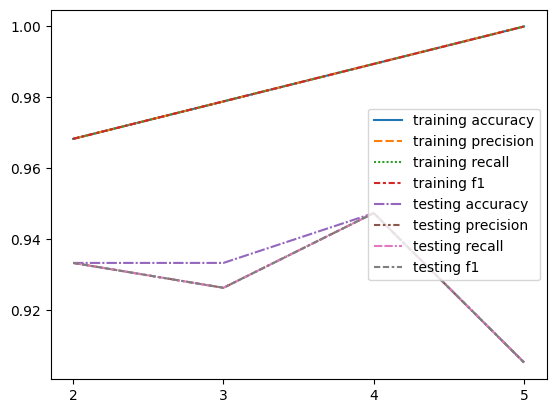

In [ ]:
sns.lineplot(results)

<Axes: xlabel='training accuracy', ylabel='testing accuracy'>

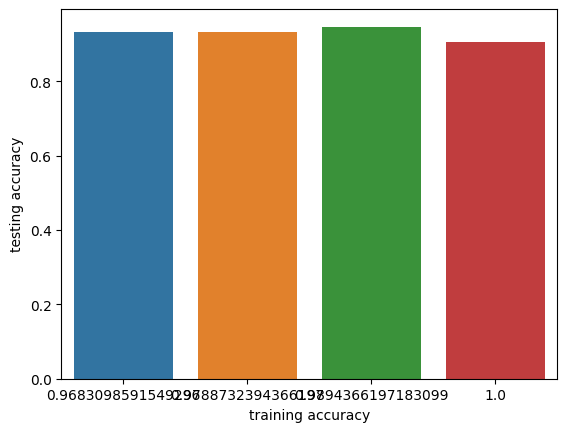

In [ ]:
sns.barplot(data=results,x='training accuracy',y='testing accuracy')

<Axes: >

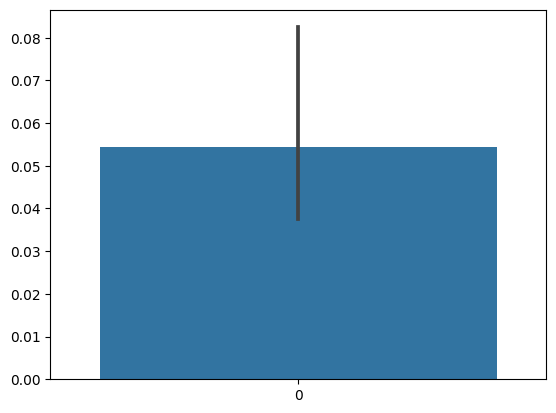

In [ ]:
sns.barplot(results['training accuracy']-results['testing accuracy'])

# Inference- The training results of the model is improving by increasing the depth of the tree, but no significant improvisation is observed in the testing set, hence resulting in model overfitting by addition of complexities.

# Impact of train test ratio on the decision tree
Multiple train test sets are considered ranging from 20-80% of test size and the accuracies of the decision tree trained on each set are finally compared to understand the influence of train test split and also to identify the ideal split for the given data.

In [ ]:
x_train0,x_test0,y_train0,y_test0= train_test_split(x,y,test_size=0.1)
x_train1,x_test1,y_train1,y_test1= train_test_split(x,y,test_size=0.2)
x_train2,x_test2,y_train2,y_test2= train_test_split(x,y,test_size=0.3)
x_train3,x_test3,y_train3,y_test3= train_test_split(x,y,test_size=0.4)
x_train4,x_test4,y_train4,y_test4= train_test_split(x,y,test_size=0.5)
x_train5,x_test5,y_train5,y_test5= train_test_split(x,y,test_size=0.6)
x_train6,x_test6,y_train6,y_test6= train_test_split(x,y,test_size=0.7)
x_train7,x_test7,y_train7,y_test7= train_test_split(x,y,test_size=0.8)
x_train8,x_test8,y_train8,y_test8= train_test_split(x,y,test_size=0.9)

In [ ]:
prnct=['90','80','70','60','50','40','30','20','10']
samples_tr=[]
samples_te=[]
accs_tr=[]
accs_te=[]

In [ ]:
samples_tr.append(x_train0.shape[0])
samples_tr.append(x_train1.shape[0])
samples_tr.append(x_train2.shape[0])
samples_tr.append(x_train3.shape[0])
samples_tr.append(x_train4.shape[0])
samples_tr.append(x_train5.shape[0])
samples_tr.append(x_train6.shape[0])
samples_tr.append(x_train7.shape[0])
samples_tr.append(x_train8.shape[0])

samples_te.append(x_test0.shape[0])
samples_te.append(x_test0.shape[0])
samples_te.append(x_test0.shape[0])
samples_te.append(x_test0.shape[0])
samples_te.append(x_test0.shape[0])
samples_te.append(x_test0.shape[0])
samples_te.append(x_test0.shape[0])
samples_te.append(x_test0.shape[0])
samples_te.append(x_test0.shape[0])

In [ ]:
model.fit(x_train0,y_train0)
accs_tr.append(accuracy_score(y_train0,model.predict(x_train0)))
accs_te.append(accuracy_score(y_test0,model.predict(x_test0)))

In [ ]:
model.fit(x_train1,y_train1)
accs_tr.append(accuracy_score(y_train1,model.predict(x_train1)))
accs_te.append(accuracy_score(y_test1,model.predict(x_test1)))

In [ ]:
model.fit(x_train2,y_train2)
accs_tr.append(accuracy_score(y_train2,model.predict(x_train2)))
accs_te.append(accuracy_score(y_test2,model.predict(x_test2)))

In [ ]:
model.fit(x_train3,y_train3)
accs_tr.append(accuracy_score(y_train3,model.predict(x_train3)))
accs_te.append(accuracy_score(y_test3,model.predict(x_test3)))

In [ ]:
model.fit(x_train4,y_train4)
accs_tr.append(accuracy_score(y_train4,model.predict(x_train4)))
accs_te.append(accuracy_score(y_test4,model.predict(x_test4)))

In [ ]:
model.fit(x_train5,y_train5)
accs_tr.append(accuracy_score(y_train5,model.predict(x_train5)))
accs_te.append(accuracy_score(y_test5,model.predict(x_test5)))

In [ ]:
model.fit(x_train6,y_train6)
accs_tr.append(accuracy_score(y_train6,model.predict(x_train6)))
accs_te.append(accuracy_score(y_test6,model.predict(x_test6)))

In [ ]:
model.fit(x_train7,y_train7)
accs_tr.append(accuracy_score(y_train7,model.predict(x_train7)))
accs_te.append(accuracy_score(y_test7,model.predict(x_test7)))

In [ ]:
model.fit(x_train8,y_train8)
accs_tr.append(accuracy_score(y_train8,model.predict(x_train8)))
accs_te.append(accuracy_score(y_test8,model.predict(x_test8)))

In [ ]:
res=pd.DataFrame([prnct,samples_tr,samples_te,accs_tr,accs_te])
res=res.T
res.columns=['train_pct','n_train_samples','n_test_samples','train_acc','test_acc']
res

,train_pct,n_train_samples,n_test_samples,train_acc,test_acc
0,90,512,57,1.0,0.894737
1,80,455,57,1.0,0.912281
2,70,398,57,1.0,0.923977
3,60,341,57,1.0,0.929825
4,50,284,57,1.0,0.919298
5,40,227,57,1.0,0.923977
6,30,170,57,1.0,0.934837
7,20,113,57,1.0,0.916667
8,10,56,57,1.0,0.80117


<Axes: xlabel='train_pct', ylabel='test_acc'>

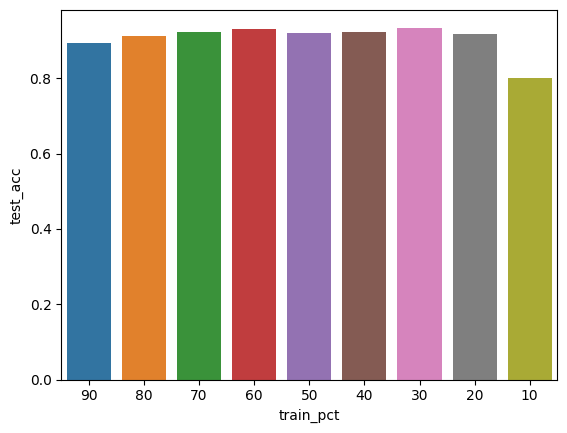

In [ ]:
sns.barplot(data=res,x='train_pct',y='test_acc')

# Identifying the best train/test split ratio
This is done by identifying the split for which the difference between the training and testing accuracies are the least (argmin). This split produces the highest testing accuracy.

In [ ]:
print(res.loc[np.argmin(res['train_acc']-res['test_acc'])])

train_pct                30
n_train_samples         170
n_test_samples           57
train_acc               1.0
test_acc           0.934837
Name: 6, dtype: object


# Separation of input features and target variable

In [ ]:
from sklearn.preprocessing import StandardScaler

y = data['diagnosis']
x = data.drop(['diagnosis'], axis=1)

# Create a StandardScaler object and then use it to scale your data
scaler = StandardScaler()
x = scaler.fit_transform(x)


# Train test split

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,stratify=y,test_size=0.2)

# KNN with 5 neighbors

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

# Create a K-Nearest Neighbors model with 5 neighbors
model = KNeighborsClassifier(n_neighbors=5)

# Fit the model to your training data
model.fit(x_train, y_train)


KNeighborsClassifier()

# Training results

acc 0.9758241758241758
precision 0.9758241758241758
recall 0.9758241758241758
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       285
           1       0.99      0.95      0.97       170

    accuracy                           0.98       455
   macro avg       0.98      0.97      0.97       455
weighted avg       0.98      0.98      0.98       455



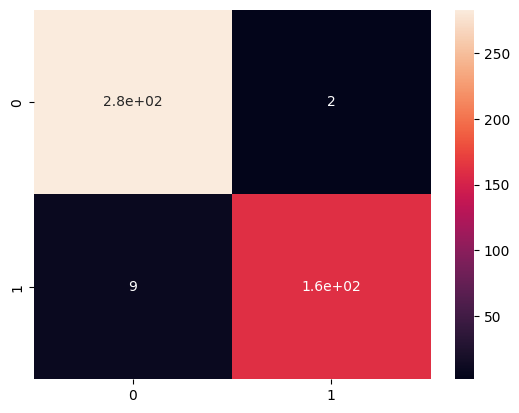

In [ ]:
import seaborn as sns
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, classification_report
o1=model.predict(x_train)
print('acc',accuracy_score(y_train,o1))
print('precision',precision_score(y_train,o1,average='micro'))
print('recall',recall_score(y_train,o1,average='micro'))
sns.heatmap(confusion_matrix(y_train,o1),annot=True)
print(classification_report(y_train,o1))

# Testing results

acc 0.9736842105263158
precision 0.9736842105263158
recall 0.9736842105263158
              precision    recall  f1-score   support

           0       0.99      0.97      0.98        72
           1       0.95      0.98      0.96        42

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



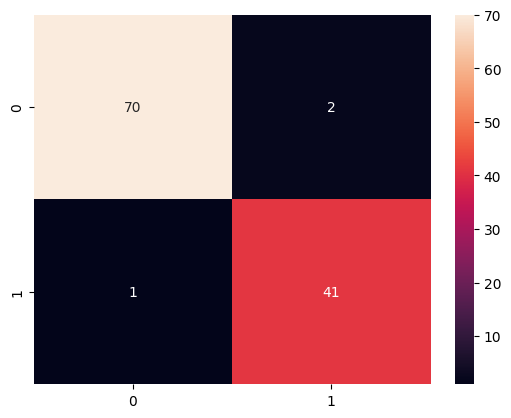

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score
o=model.predict(x_test)
print('acc',accuracy_score(y_test,o))
print('precision',precision_score(y_test,o,average='micro'))
print('recall',recall_score(y_test,o,average='micro'))
sns.heatmap(confusion_matrix(y_test,o),annot=True)
print(classification_report(y_test,o))

# Training visualization

<Axes: title={'center': '5 neighbor KNN Learning Curve'}, xlabel='Training examples', ylabel='Score'>

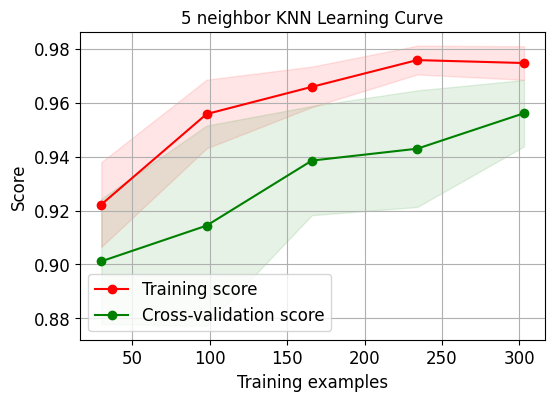

In [ ]:
# Install scikit-plot
!pip install scikit-plot

# Import necessary libraries
import scikitplot as skplt
from sklearn.neighbors import KNeighborsClassifier

# Create a K-Nearest Neighbors model with 5 neighbors
model = KNeighborsClassifier(n_neighbors=5)

# Plot the learning curve for the KNN model
skplt.estimators.plot_learning_curve(model, x_train, y_train,
                                     cv=3, shuffle=True, scoring="accuracy",
                                     n_jobs=-1, figsize=(6, 4), title_fontsize="large", text_fontsize="large",
                                     title="5 neighbor KNN Learning Curve")


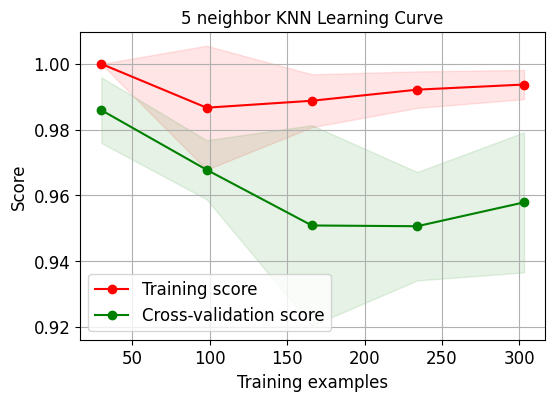

In [ ]:
import scikitplot as skplt
skplt.estimators.plot_learning_curve(KNeighborsClassifier(n_neighbors=5), x_train, y_train,
                                     cv=3, shuffle=True, scoring="precision",
                                     n_jobs=-1, figsize=(6,4), title_fontsize="large", text_fontsize="large",
                                     title="5 neighbor KNN Learning Curve");

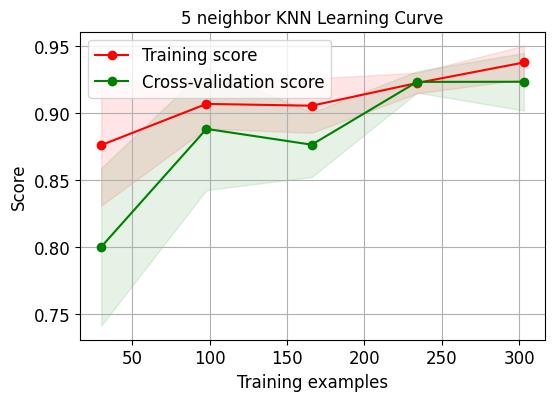

In [ ]:
import scikitplot as skplt
skplt.estimators.plot_learning_curve(KNeighborsClassifier(n_neighbors=5), x_train, y_train,
                                     cv=3, shuffle=True, scoring="recall",
                                     n_jobs=-1, figsize=(6,4), title_fontsize="large", text_fontsize="large",
                                     title="5 neighbor KNN Learning Curve");

# Testing visualizations

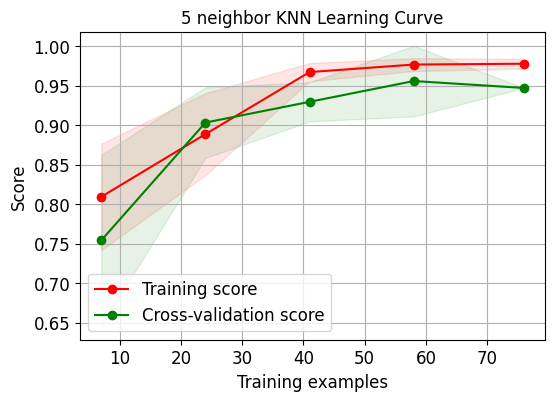

In [ ]:
import scikitplot as skplt
skplt.estimators.plot_learning_curve(KNeighborsClassifier(n_neighbors=5), x_test, y_test,
                                     cv=3, shuffle=True, scoring="accuracy",
                                     n_jobs=-1, figsize=(6,4), title_fontsize="large", text_fontsize="large",
                                     title="5 neighbor KNN Learning Curve");

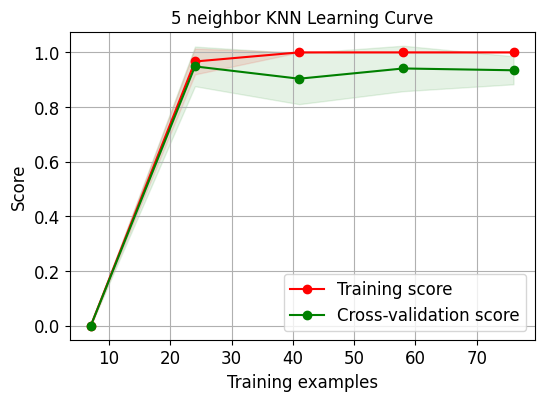

In [ ]:
import scikitplot as skplt
skplt.estimators.plot_learning_curve(KNeighborsClassifier(n_neighbors=5), x_test, y_test,
                                     cv=3, shuffle=True, scoring="precision",
                                     n_jobs=-1, figsize=(6,4), title_fontsize="large", text_fontsize="large",
                                     title="5 neighbor KNN Learning Curve");

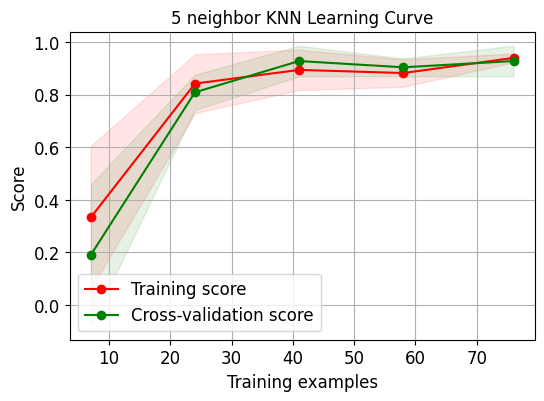

In [ ]:
import scikitplot as skplt
skplt.estimators.plot_learning_curve(KNeighborsClassifier(n_neighbors=5), x_test, y_test,
                                     cv=3, shuffle=True, scoring="recall",
                                     n_jobs=-1, figsize=(6,4), title_fontsize="large", text_fontsize="large",
                                     title="5 neighbor KNN Learning Curve");

# **Scatter plot on texture_mean and radius_mean with decision boundary
 The KNN model is fitted on these two features and then a meshgrid is generated for showing the scatterplot and countorplot for decision boundary

In [ ]:
data_t=data.loc[:,['texture_mean','radius_mean','diagnosis']]
y_t=data_t['diagnosis']
x_t=data_t.drop(['diagnosis'],axis=1)
model_5=KNeighborsClassifier(n_neighbors=5)
model_5.fit(x_t,y_t)

KNeighborsClassifier()

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


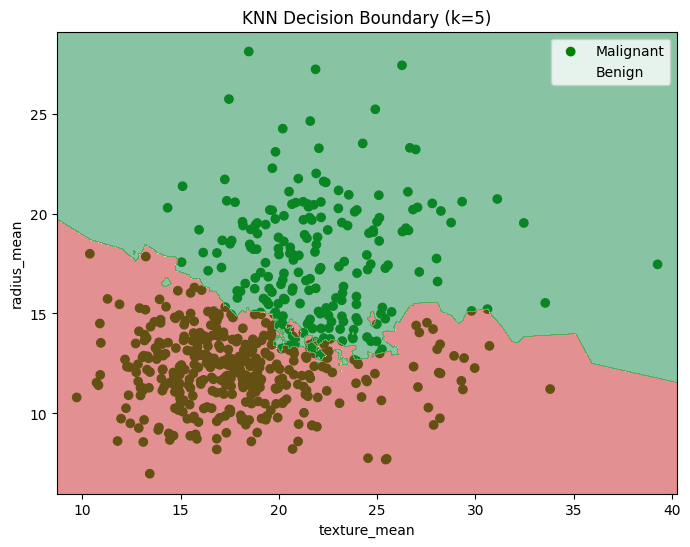

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(data['texture_mean'], data['radius_mean'], c=np.where(y == 'M', 'r', 'g'), label='Data points')
plt.xlabel('texture_mean')
plt.ylabel('radius_mean')

# Creating a meshgrid to visualize the decision boundary
x_min, x_max = data['texture_mean'].min() - 1, data['texture_mean'].max() + 1
y_min, y_max = data['radius_mean'].min() - 1, data['radius_mean'].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))
Z = model_5.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot the decision boundary
plt.contourf(xx, yy, Z, alpha=0.5, cmap=plt.cm.RdYlGn)
plt.title('KNN Decision Boundary (k=5)')
plt.legend(['Malignant', 'Benign'])
plt.show()

In [ ]:
model1=KNeighborsClassifier(n_neighbors=15)
model1.fit(x_t,y_t)

KNeighborsClassifier(n_neighbors=15)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


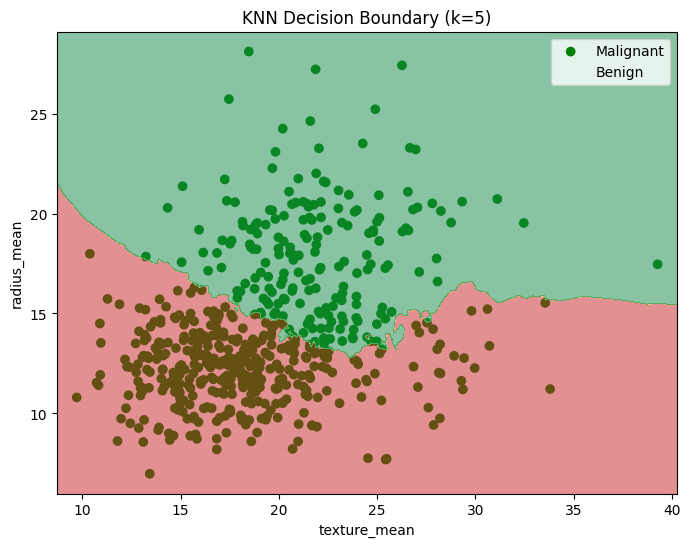

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(data['texture_mean'], data['radius_mean'], c=np.where(y == 'M', 'r', 'g'), label='Data points')
plt.xlabel('texture_mean')
plt.ylabel('radius_mean')

# Creating a meshgrid to visualize the decision boundary
x_min, x_max = data['texture_mean'].min() - 1, data['texture_mean'].max() + 1
y_min, y_max = data['radius_mean'].min() - 1, data['radius_mean'].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))
Z = model1.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot the decision boundary
plt.contourf(xx, yy, Z, alpha=0.5, cmap=plt.cm.RdYlGn)
plt.title('KNN Decision Boundary (k=5)')
plt.legend(['Malignant', 'Benign'])
plt.show()

Accuracy: 0.9758241758241758
Precision (micro): 0.9758241758241758
Recall (micro): 0.9758241758241758
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       285
           1       0.99      0.95      0.97       170

    accuracy                           0.98       455
   macro avg       0.98      0.97      0.97       455
weighted avg       0.98      0.98      0.98       455



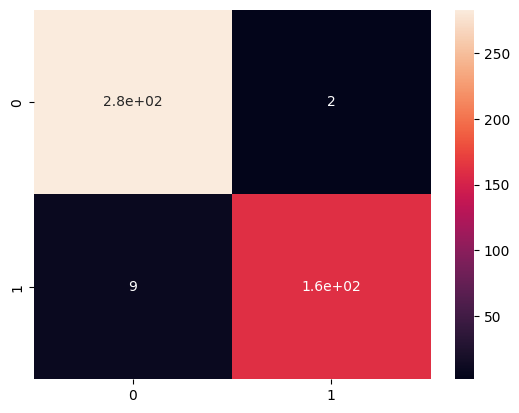

In [77]:
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, classification_report

# Create a K-Nearest Neighbors model with 5 neighbors
model = KNeighborsClassifier(n_neighbors=5)

# Fit the model to your training data
model.fit(x_train, y_train)

# Make predictions
o1 = model.predict(x_train)

# Calculate and print evaluation metrics
print('Accuracy:', accuracy_score(y_train, o1))
print('Precision (micro):', precision_score(y_train, o1, average='micro'))
print('Recall (micro):', recall_score(y_train, o1, average='micro'))

# Create and display a confusion matrix heatmap
sns.heatmap(confusion_matrix(y_train, o1), annot=True)

# Generate and print a classification report
print(classification_report(y_train, o1))
